## Unit 7 | Assignment - Distinguishing Sentiments

## Background

__Twitter__ has become a wildly sprawling jungle of information&mdash;140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

Choose __one__ of the following two assignments, in which you will do just that. Good luck!

## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.


The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.



### Observed Trend

In [2]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
% matplotlib inline

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = 'RF125avZqsqHFrWYZs88EYNop'
consumer_secret = 'sSryRp4HttVXySNs5MqbULE9oR9l4Lnkn3ULGnLIPoRxcQDM9A'
access_token = '892258092108333056-9EE89SpCevqFwkg61vBGJoHYqbfb0A5'
access_token_secret = 'Dzuou3NA6QaRipajIUyCl5xFAFVEFUN1iwhztsbrWt9jD'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())




In [4]:
# select news source from twitter
news_source = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]




In [5]:
tweet = api.user_timeline("FoxNews", page=0)





In [6]:
# store data in dictionary
tweet_data = {"source": [], 
              "text": [], 
              "date": [], 
              "compound": [], 
              "negative": [], 
              "neutral": [], 
              "positive": []}

# grab 100 tweets from each site
for x in range(5):
    
    # loop through news source:
    for source in news_source:
        
        # grab the tweet
        tweets = api.user_timeline(source, page=x)
        
        for tweet in tweets:
            # grab data from tweets API call (20 for each page)
            tweet_data["source"].append(tweet["user"]["name"])
            tweet_data["text"].append(tweet["text"])
            tweet_data["date"].append(tweet["created_at"])
            
            # calculate for sentiment
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # add to data dictionary
            tweet_data["compound"].append(compound)
            tweet_data["positive"].append(pos)
            tweet_data["neutral"].append(neu)
            tweet_data["negative"].append(neg)
            

In [7]:
# convert dictionary to dataframe
tweet_df = pd.DataFrame(tweet_data)





In [8]:
tweet_df.head()





,compound,date,negative,neutral,positive,source,text
0,-0.2960,Wed Apr 04 23:48:26 +0000 2018,0.144,0.856,0.000,Fox News,WATCH: @edhenry sits down with EPA Chief Scott...
1,-0.2263,Wed Apr 04 23:41:21 +0000 2018,0.091,0.909,0.000,Fox News,RT @FoxNewsResearch: Every president since Ron...
2,-0.6249,Wed Apr 04 23:32:42 +0000 2018,0.215,0.785,0.000,Fox News,.@JonathanTurley: “If they’re waiting for a co...
3,0.5095,Wed Apr 04 23:18:29 +0000 2018,0.000,0.852,0.148,Fox News,.@GovMikeHuckabee: “@POTUS needs to have his m...
4,0.0000,Wed Apr 04 23:13:27 +0000 2018,0.000,1.000,0.000,Fox News,.@GovMikeHuckabee: “We have borders. Every cou...


In [9]:
# convert date from string to datetime
tweet_df["date"] = pd.to_datetime(tweet_df["date"])



In [10]:
tweet_df.head()




,compound,date,negative,neutral,positive,source,text
0,-0.2960,2018-04-04 23:48:26,0.144,0.856,0.000,Fox News,WATCH: @edhenry sits down with EPA Chief Scott...
1,-0.2263,2018-04-04 23:41:21,0.091,0.909,0.000,Fox News,RT @FoxNewsResearch: Every president since Ron...
2,-0.6249,2018-04-04 23:32:42,0.215,0.785,0.000,Fox News,.@JonathanTurley: “If they’re waiting for a co...
3,0.5095,2018-04-04 23:18:29,0.000,0.852,0.148,Fox News,.@GovMikeHuckabee: “@POTUS needs to have his m...
4,0.0000,2018-04-04 23:13:27,0.000,1.000,0.000,Fox News,.@GovMikeHuckabee: “We have borders. Every cou...


In [11]:
# sort dataframe (hint: use .sort_values(by="column name", inplace=True))
tweet_df.sort_values(by="date", ascending=True)




,compound,date,negative,neutral,positive,source,text
459,-0.6908,2018-04-03 16:08:03,0.266,0.734,0.000,BBC News (World),RT @BBCDomC: BBC News Reality Check: Has Londo...
458,0.0000,2018-04-03 16:54:08,0.000,1.000,0.000,BBC News (World),Israel and Saudi Arabia: The relationship emer...
457,-0.8225,2018-04-03 17:36:27,0.521,0.479,0.000,BBC News (World),Waterslide designer arrested after boy killed ...
456,0.0000,2018-04-03 17:54:02,0.000,1.000,0.000,BBC News (World),Trump vows to put US military in charge of sou...
455,-0.2960,2018-04-03 17:57:13,0.306,0.694,0.000,BBC News (World),Tearful reunion with missing daughter https://...
454,0.5574,2018-04-03 18:15:59,0.000,0.714,0.286,BBC News (World),Nigerian 'migrant hero' baptised by Pope after...
453,0.0000,2018-04-03 19:00:28,0.000,1.000,0.000,BBC News (World),RT @BBCNorthAmerica: Donald Trump says he will...
452,0.2263,2018-04-03 19:30:22,0.000,0.826,0.174,BBC News (World),Man pardoned by hotel after seagull and pepper...
451,-0.2023,2018-04-03 19:38:36,0.184,0.816,0.000,BBC News (World),Swastika removed from controversial Nazi bell ...
450,0.4796,2018-04-03 20:07:31,0.119,0.677,0.204,BBC News (World),RT @BBCSport: GOAL! Juventus 0-2 Real Madrid\n...


In [12]:
# filter data
BBC = tweet_df[tweet_df["source"] == "BBC News (World)"]
CNN = tweet_df[tweet_df["source"] == "CNN"]
NYT = tweet_df[tweet_df["source"] == "The New York Times"]
FOX = tweet_df[tweet_df["source"] == "Fox News"]
CBS = tweet_df[tweet_df["source"] == "CBS News"]

([<matplotlib.axis.XTick at 0x11cac1278>,
 <a list of 6 Text xticklabel objects>)

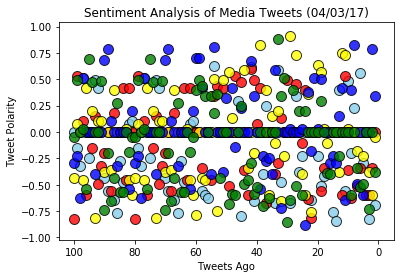

In [26]:
# matplotlib
# BBC News world
plt.scatter(np.arange(-len(BBC), 0, 1), BBC["compound"], edgecolor="black", marker="o", color="skyblue", s=100, alpha=0.8, label="BBC")
plt.scatter(np.arange(-len(CNN), 0, 1), CNN["compound"], edgecolor="black", marker="o", color="red", s=100, alpha=0.8, label="CNN")
plt.scatter(np.arange(-len(NYT), 0, 1), NYT["compound"], edgecolor="black", marker="o", color="yellow", s=100, alpha=0.8, label="NYT ")
plt.scatter(np.arange(-len(FOX), 0, 1), FOX["compound"], edgecolor="black", marker="o", color="blue", s=100, alpha=0.8, label="FOX")
plt.scatter(np.arange(-len(CBS), 0, 1), CBS["compound"], edgecolor="black", marker="o", color="green", s=100, alpha=0.8, label="CBS")



#graph properties
plt.title("Sentiment Analysis of Media Tweets (04/03/17)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])


In [14]:
# group your sources and take mean of compound
grouped_mean = tweet_df.groupby(["source"]).mean()["compound"]

In [15]:
grouped_mean

source
BBC News (World)     -0.122237
CBS News             -0.102156
CNN                  -0.078656
Fox News              0.023760
The New York Times   -0.039914
Name: compound, dtype: float64

In [29]:
BBC_mean = grouped_mean["BBC News (World)"]
CNN_mean = grouped_mean["CNN"]
NYT_mean = grouped_mean["The New York Times"]
FOX_mean = grouped_mean["Fox News"]
CBS_mean = grouped_mean["CBS News"]


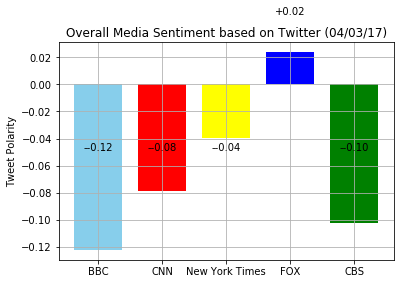

In [38]:
tweets_polarity = [BBC_mean, CNN_mean, NYT_mean, FOX_mean, CBS_mean]

# generate bars for barplot
fig, ax = plt.subplots()

#generate indexes for bar plots
ind = np.arange(len(tweets_polarity))
width = 0.75

BBC_bar = ax.bar(ind[0], tweets_polarity[0], width, color="skyblue")
CNN_bar = ax.bar(ind[1], tweets_polarity[1], width, color="red")
NYT_bar = ax.bar(ind[2], tweets_polarity[2], width, color="yellow")
FOX_bar = ax.bar(ind[3], tweets_polarity[3], width, color="blue")
CBS_bar = ax.bar(ind[4], tweets_polarity[4], width, color="green")
# Generate labels for each news source
def autolabelneg(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, -0.05,
                '-%.2f' % float(height), 
                ha='center', va='bottom')
        
def autolabelpos(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, 0.05,
                '+%.2f' % float(height), 
                ha='center', va='bottom')
        
# call function to apply on our bars
autolabelneg(BBC_bar)
autolabelneg(CNN_bar)
autolabelneg(NYT_bar)
autolabelneg(CBS_bar)
autolabelpos(FOX_bar)
# set graph parameters
ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter (04/03/17)")
ax.set_xticks(ind)
ax.set_xticklabels(["BBC", "CNN", "New York Times", "FOX", "CBS"])
ax.set_autoscaley_on(True)
ax.grid(True)

# plt.savefig("name_of_fig")